In [1]:
import tensorflow as tf
import pandas as pd
import regex as re
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import regularizers
import numpy as np

/Users/lubicasimkovicova/dev/myvenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load the saved model
loaded_model = tf.keras.models.load_model("/Users/lubicasimkovicova/Desktop/Bachelorthesis---Sentiment-Analysis-with-Deep-Learning-main-2/model_new")

In [3]:
# import tweets from Clinton and Trump
df = pd.read_csv('/Users/lubicasimkovicova/Desktop/Bachelorthesis---Sentiment-Analysis-with-Deep-Learning-main-2/tweets_clinton_trump.csv')

In [4]:
df.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [5]:
df.columns

Index(['id', 'handle', 'text', 'is_retweet', 'original_author', 'time',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'lang', 'retweet_count',
       'favorite_count', 'longitude', 'latitude', 'place_id',
       'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box', 'source_url', 'truncated', 'entities',
       'extended_entities'],
      dtype='object')

In [6]:
text_handle = df.drop(['id', 'is_retweet', 'original_author', 'time',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'lang', 'retweet_count',
       'favorite_count', 'longitude', 'latitude', 'place_id',
       'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box', 'source_url', 'truncated', 'entities',
       'extended_entities'],axis=1)

In [7]:
text_handle.tail()

,handle,text
6439,realDonaldTrump,"""@lilredfrmkokomo: @realDonaldTrump My Faceboo..."
6440,realDonaldTrump,"""@marybnall01: @realDonaldTrump watched lowell..."
6441,realDonaldTrump,"""@ghosthunter_lol: Iowa key endorsement for @r..."
6442,realDonaldTrump,"""@iLoveiDevices: @EdwinRo47796972 @happyjack22..."
6443,realDonaldTrump,"""@SalRiccobono: @realDonaldTrump @troyconway D..."


In [8]:
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #remove mentions
    text = re.sub(r'#','', text) #remove hash
    text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
    text = re.sub('\s+', ' ', text) #remove new line char
    text = re.sub("\'", "", text) #remove single quotes
    
    return text

In [9]:
text_handle["text"] = text_handle["text"].apply(cleantext)

In [10]:
text_handle["text"].head(15)

0     The question in this election: Who can put the...
1     Last night, Donald Trump said not paying taxes...
2     Couldnt be more proud of . Her vision and comm...
3     If we stand together, theres nothing we cant d...
4     Both candidates were asked about how theyd con...
5     Join me for a 3pm rally - tomorrow at the Mid-...
6     This election is too important to sit out. Go ...
7       When Donald Trump goes low...register to vote: 
8     Once again, we will have a government of, by a...
9     3) Has Trump offered a single proposal to redu...
10    The election is just weeks away. Check if your...
11    On National VoterRegistrationDay, make sure yo...
12    Hillary Clintons Campaign Continues To Make Fa...
13    CNBC, Time magazine online polls say Donald Tr...
14    Donald Trump lied to the American people at le...
Name: text, dtype: object

In [11]:
import string
text_handle["text"] = text_handle["text"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])

In [12]:
text_handle["text"] = text_handle["text"].apply(lambda wrd: ''.join(wrd))

In [13]:
text_handle["text"]

0       the question in this election who can put the ...
1       last night donald trump said not paying taxes ...
2       couldnt be more proud of  her vision and comma...
3       if we stand together theres nothing we cant do...
4       both candidates were asked about how theyd con...
                              ...                        
6439     my facebook groups are all voting trump 4000 ...
6440     watched lowell mass speech awesome great crow...
6441    lol iowa key endorsement for cant wait for the...
6442     minimizing dependency on china is crucialonly...
6443     donald get big business back and make america...
Name: text, Length: 6444, dtype: object

In [14]:
from nltk.corpus import stopwords

In [15]:
text_handle["text"][:50] = text_handle["text"][:50].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("english")]))

In [16]:
text_handle["text"]

0       question election put plans action make life b...
1       last night donald trump said paying taxes smar...
2       couldnt proud vision command last nights debat...
3       stand together theres nothing cant make sure y...
4       candidates asked theyd confront racial injusti...
                              ...                        
6439     my facebook groups are all voting trump 4000 ...
6440     watched lowell mass speech awesome great crow...
6441    lol iowa key endorsement for cant wait for the...
6442     minimizing dependency on china is crucialonly...
6443     donald get big business back and make america...
Name: text, Length: 6444, dtype: object

In [17]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),     deacc=True))

In [18]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [19]:
temp = []
data_to_list = text_handle['text'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(data_to_list[i])
data_wordslem = list(sent_to_words(temp))

Using Lemmatizer instead of stemming. Lemmatizer is preffered over stemming. Lemmatizer find the root word whereas Stemmizer shorten the word. For Example, word 'Caring' -> Lemmatizer -> 'Care' WHEREAS 'Caring' -> Stemming -> 'Car'

In [20]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()

In [21]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/lubicasimkovicova/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
for i in range(len(data_wordslem)):
    for j in range(len(data_wordslem[i])):
        data_wordslem[i][j] = lemmatizer.lemmatize(data_wordslem[i][j],pos="v")

In [23]:
data = []
for i in range(len(data_wordslem)):
    data.append(detokenize(data_wordslem[i]))
print(data[:5])

['question election put plan action make life better', 'last night donald trump say pay tax smart know call unpatriotic', 'couldnt proud vision command last nights debate show shes ready next', 'stand together theres nothing cant make sure youre ready vote', 'candidates ask theyd confront racial injustice one real answer']


In [24]:
# add new cleaned column to dataframe
text_handle["data"] = data
text_handle

,handle,text,data
0,HillaryClinton,question election put plans action make life b...,question election put plan action make life be...
1,HillaryClinton,last night donald trump said paying taxes smar...,last night donald trump say pay tax smart know...
2,HillaryClinton,couldnt proud vision command last nights debat...,couldnt proud vision command last nights debat...
3,HillaryClinton,stand together theres nothing cant make sure y...,stand together theres nothing cant make sure y...
4,HillaryClinton,candidates asked theyd confront racial injusti...,candidates ask theyd confront racial injustice...
...,...,...,...
6439,realDonaldTrump,my facebook groups are all voting trump 4000 ...,my facebook group be all vote trump people great
6440,realDonaldTrump,watched lowell mass speech awesome great crow...,watch lowell mass speech awesome great crowd m...
6441,realDonaldTrump,lol iowa key endorsement for cant wait for the...,lol iowa key endorsement for cant wait for the...
6442,realDonaldTrump,minimizing dependency on china is crucialonly...,minimize dependency on china be crucialonly tr...


In [25]:
text_handle.shape

(6444, 3)

In [26]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   22  249  154]
 [   0    0    0 ...   78  143 3695]
 [   0    0    0 ...  581  318  236]
 ...
 [   0    0    0 ...    5 1090    6]
 [   0    0    0 ...  145   39   15]
 [   0    0    0 ...   24   80    9]]


In [27]:
# apply the model
#predictions = loaded_model.predict(tweets)

In [28]:
sentiment = ['Neutral','Negative','Positive']

In [29]:
sequence = tokenizer.texts_to_sequences(['I go to gym daily'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(loaded_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 376ms/step


'Positive'

In [30]:
unique_handles = text_handle["handle"].unique()
unique_handles

array(['HillaryClinton', 'realDonaldTrump'], dtype=object)

In [31]:
def sentiment_analysis2(data):
    sentiment_storage = []
    for d in data:
        sequence = tokenizer.texts_to_sequences([d])        
        test = pad_sequences(sequence, maxlen=max_len)
        prediction = loaded_model.predict(test, verbose=0)
        sentiment_label = sentiment[np.argmax(prediction)]
        sentiment_storage.append(sentiment_label)

    return sentiment_storage

In [32]:
# This took a very long time (45min - 1hr). It predicted the sentiment of each
# of the approximately 6600 Twitter posts.

predicted_sentiment = sentiment_analysis2(data)

In [33]:
text_handle["predicted_sentiment"] = predicted_sentiment

In [34]:
text_handle

,handle,text,data,predicted_sentiment
0,HillaryClinton,question election put plans action make life b...,question election put plan action make life be...,Neutral
1,HillaryClinton,last night donald trump said paying taxes smar...,last night donald trump say pay tax smart know...,Neutral
2,HillaryClinton,couldnt proud vision command last nights debat...,couldnt proud vision command last nights debat...,Neutral
3,HillaryClinton,stand together theres nothing cant make sure y...,stand together theres nothing cant make sure y...,Negative
4,HillaryClinton,candidates asked theyd confront racial injusti...,candidates ask theyd confront racial injustice...,Neutral
...,...,...,...,...
6439,realDonaldTrump,my facebook groups are all voting trump 4000 ...,my facebook group be all vote trump people great,Neutral
6440,realDonaldTrump,watched lowell mass speech awesome great crow...,watch lowell mass speech awesome great crowd m...,Neutral
6441,realDonaldTrump,lol iowa key endorsement for cant wait for the...,lol iowa key endorsement for cant wait for the...,Neutral
6442,realDonaldTrump,minimizing dependency on china is crucialonly...,minimize dependency on china be crucialonly tr...,Neutral


# Visualize the results

In [35]:
hillary_positive_sentiment = text_handle[(text_handle['handle'] == 'HillaryClinton') & (text_handle['predicted_sentiment'] == 'Positive')]
hillary_positive_sentiment

,handle,text,data,predicted_sentiment
26,HillaryClinton,work hard living poverty,work hard live poverty,Positive
74,HillaryClinton,hillary clinton did what she needed to do,hillary clinton do what she need to do,Positive
122,HillaryClinton,its about time this country had somebody runni...,its about time this country have somebody run ...,Positive
132,HillaryClinton,donald trump may live in his own reality—but w...,donald trump may live in his own reality but w...,Positive
147,HillaryClinton,lets do this debatenight,let do this debatenight,Positive
...,...,...,...,...
4842,HillaryClinton,we did it new york watch hillary live,we do it new york watch hillary live,Positive
4845,HillaryClinton,to our volunteers organizers and supporters wh...,to our volunteer organizers and supporters who...,Positive
4846,HillaryClinton,lets win this nomination chip in 3 to let hill...,let win this nomination chip in to let hillary...,Positive
4851,HillaryClinton,whats up to while new yorkers vote check out s...,whats up to while new yorkers vote check out l...,Positive


In [36]:
# group by each candidate and each sentiment
hillary_negative_sentiment = text_handle[(text_handle['handle'] == 'HillaryClinton') & (text_handle['predicted_sentiment'] == 'Negative')]
hillary_neutral_sentiment = text_handle[(text_handle['handle'] == 'HillaryClinton') & (text_handle['predicted_sentiment'] == 'Neutral')]
trump_negative_sentiment = text_handle[(text_handle['handle'] == 'realDonaldTrump') & (text_handle['predicted_sentiment'] == 'Negative')]
trump_positive_sentiment = text_handle[(text_handle['handle'] == 'realDonaldTrump') & (text_handle['predicted_sentiment'] == 'Positive')]
trump_neutral_sentiment = text_handle[(text_handle['handle'] == 'realDonaldTrump') & (text_handle['predicted_sentiment'] == 'Neutral')]

In [38]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Polarity of posts of each candidate')

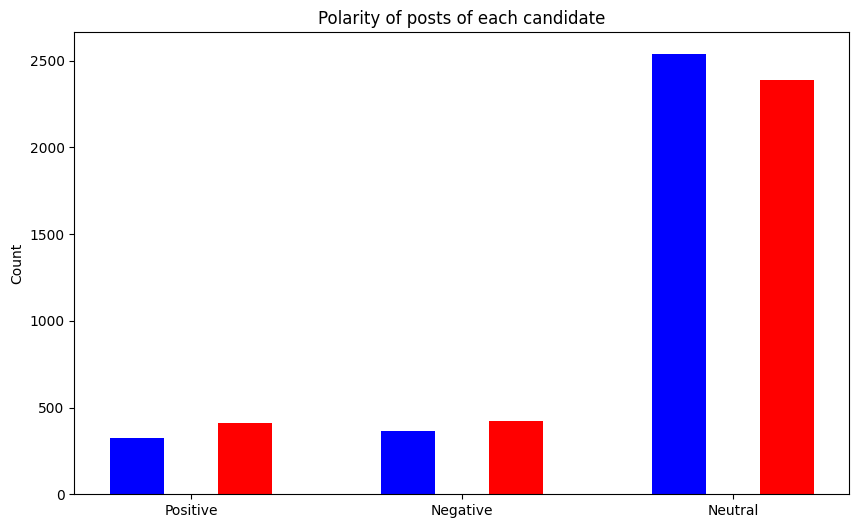

In [39]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for Hillary Clinton
bar_width = 0.2
bar_positions_hillary = range(1, 4)
ax.bar([p - bar_width for p in bar_positions_hillary], [len(hillary_positive_sentiment), len(hillary_negative_sentiment), len(hillary_neutral_sentiment)], width=bar_width, label='Hillary Clinton', color='blue')

# Plotting bars for Donald Trump
bar_positions_trump = range(1, 4)
ax.bar([p + bar_width for p in bar_positions_trump], [len(trump_positive_sentiment), len(trump_negative_sentiment), len(trump_neutral_sentiment)], width=bar_width, label='Donald Trump', color='red')

# Set labels and title
ax.set_xticks([p for p in bar_positions_hillary])
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'])
ax.set_ylabel('Count')
ax.set_title('Polarity of posts of each candidate')